In [50]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
data=pd.read_csv('/content/drive/MyDrive/MSDS570/AI Impact on jobs.csv')
data.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


In [53]:
data.dtypes

,0
Job titiles,object
AI Impact,object
Tasks,int64
AI models,int64
AI_Workload_Ratio,float64
Domain,object


In [54]:
#convert object representing percentage to int
data['AI Impact'] = data['AI Impact'].str.rstrip('%').astype('int')
data.dtypes

,0
Job titiles,object
AI Impact,int64
Tasks,int64
AI models,int64
AI_Workload_Ratio,float64
Domain,object


In [55]:
#change column names
data.rename(columns={'AI Impact':'AI Impact by %'},inplace=True)
data.head()

,Job titiles,AI Impact by %,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98,365,2546,0.143362,Communication & PR
1,Data Collector,95,299,2148,0.139199,Data & IT
2,Data Entry,95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92,194,1369,0.141709,Medical & Healthcare


In [56]:
#rename column 1
data.rename(columns={'Job titiles':'Job Title'},inplace=True)
data.head()

,Job Title,AI Impact by %,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98,365,2546,0.143362,Communication & PR
1,Data Collector,95,299,2148,0.139199,Data & IT
2,Data Entry,95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92,194,1369,0.141709,Medical & Healthcare


In [57]:
#Round all AI workload ratio to 3rd decimal place
data['AI_Workload_Ratio'] = data['AI_Workload_Ratio'].round(3)
data.head()

,Job Title,AI Impact by %,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98,365,2546,0.143,Communication & PR
1,Data Collector,95,299,2148,0.139,Data & IT
2,Data Entry,95,325,2278,0.143,Administrative & Clerical
3,Mail Clerk,95,193,1366,0.141,Leadership & Strategy
4,Compliance Officer,92,194,1369,0.142,Medical & Healthcare


In [58]:
#show range for AI impact by %
data['AI Impact by %'].describe()

,AI Impact by %
count,4706.000000
mean,30.312580
std,18.203777
min,5.000000
25%,15.000000
50%,25.000000
75%,40.000000
max,98.000000


In [59]:
#display unique values for job titles and domain
data['Job Title'].unique()

array(['Communications Manager', 'Data Collector', 'Data Entry', ...,
       'Director', 'Nurse', 'Technician'], dtype=object)

In [60]:
#display unique values for job titles and domain
data['Domain'].unique()

array(['Communication & PR', 'Data & IT', 'Administrative & Clerical',
       'Leadership & Strategy', 'Medical & Healthcare',
       'Supply Chain & Logistics', 'Law Enforcement', 'Construction',
       'Sales & Marketing', 'Hospitality'], dtype=object)

In [61]:
#use KNN to find missing values using KNN
data.isnull().sum()

,0
Job Title,0
AI Impact by %,0
Tasks,0
AI models,0
AI_Workload_Ratio,0
Domain,0


In [62]:
#display avaerage workload ratio by Domain
data.groupby('Domain')['AI_Workload_Ratio'].mean()

,AI_Workload_Ratio
Domain,
Administrative & Clerical,inf
Communication & PR,0.200410
Construction,inf
Data & IT,inf
Hospitality,0.204740
Law Enforcement,inf
Leadership & Strategy,0.204870
Medical & Healthcare,inf
Sales & Marketing,0.207536


In [63]:
#show average tasks by domain
data.groupby('Domain')['Tasks'].mean()

,Tasks
Domain,
Administrative & Clerical,395.673036
Communication & PR,398.898089
Construction,410.734043
Data & IT,392.452229
Hospitality,416.682979
Law Enforcement,401.202128
Leadership & Strategy,398.779193
Medical & Healthcare,386.643312
Sales & Marketing,412.740426


In [64]:
#does the variance in column tasks equal the mean in column tasks?
import statistics
print("Variance of sample set is % s"
      %(statistics.variance(data.Tasks)))



Variance of sample set is 97072.6127176151


In [65]:
#show the mean of tasks
data['Tasks'].mean()

400.7080322991925

# Our data is not equally dispersed

array([[<Axes: title={'center': 'Tasks'}>]], dtype=object)

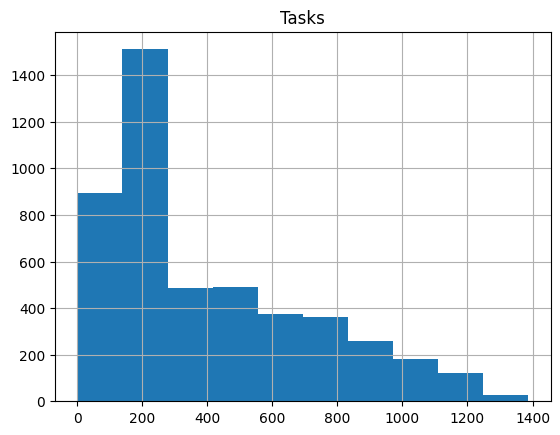

In [68]:
# display histgram for domain tasks
data.hist(column='Tasks')

In [71]:
data.columns

Index(['Job Title', 'AI Impact by %', 'Tasks', 'AI models',
       'AI_Workload_Ratio', 'Domain'],
      dtype='object')

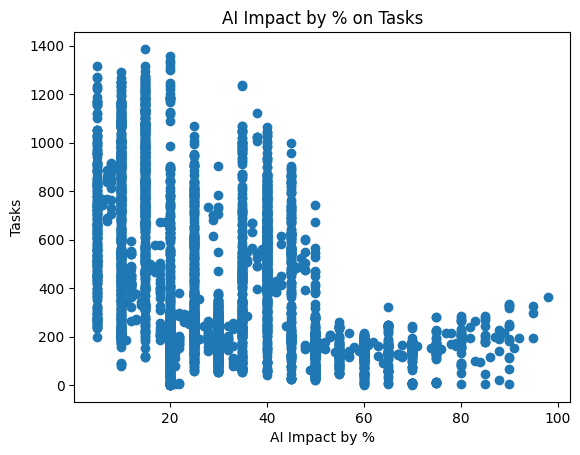

In [81]:

plt.scatter(data['AI Impact by %'],data['Tasks'])
plt.title('AI Impact by % on Tasks')
plt.xlabel('AI Impact by %')
plt.ylabel('Tasks')
plt.show()

In [ ]:
#use dash to create a scatterplot that displays the

In [ ]:
# use plotly express to show AI workload ratio
fig = px.histogram(data, x="AI_Workload_Ratio")
fig.show()

In [ ]:
pip install dash

In [ ]:
data.columns

In [ ]:
#change column name
data.rename(columns={'AI Impact by %':'AI_Impact_Pct'},inplace=True)
data.columns

In [ ]:
data